# Preprocesamiento de las imágenes de Emojis
Este cuaderno muestra los pasos para preprocesar las imágenes del conjunto de Emojis utilizando OpenCV. Las imágenes corresponden a cinco clases de trazos de emojis hechos a mano, los cuales no están estandarizados ni centrados en las imágenes. Por ello, es necesario transformar las imágenes de Emojis a una representación más simple con el trazo centrado y sin colores en el fondo.

In [6]:
# Librerías necesarias
import os
import pickle

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# En esta sección ser cargan las imágenes a color de emojis. Las imágenes
# se orginizan en 5 directorios, los cuales son: Angry, Happy, Poo, Sad y Surprise.
# Los nombres de las imágenes no están estandarizadas, por lo que es necesario primero ver qué hay 
# en cada directorio y después cargarlas.

path = 'Emojis/'

emojis = []
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']
for label in labels:
    folder = os.path.join(path, label)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                emojis.append((img, label))

print("Número total de imágenes cargadas:", len(emojis))

Número total de imágenes cargadas: 2530


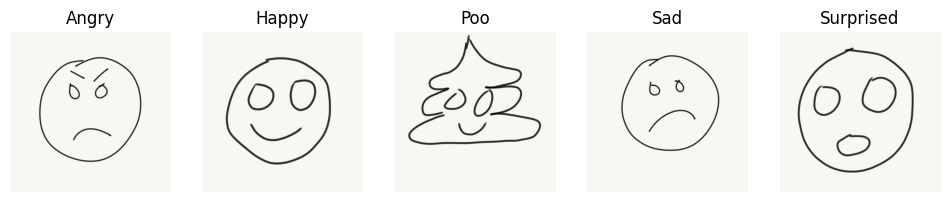

In [3]:
# Muestra una imagen de cada categoría
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
            break

In [8]:
# Preprocesamiento de las imágenes. Las imágenes las vamos a pasar a escala de grises, a un 
# tamaño de 32x32 píxeles. Desafortunadamente, los trazos no están centrados en la imagen, por lo que
# también es necesario encontrar la zona del trazo, y recortarlo para después centrarlo en la imagen.

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Imagen binaria (fondo blanco, trazos negros)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        min_area = 30
        all_points = np.vstack([cnt for cnt in contours if cv2.contourArea(cnt) > min_area])
        x, y, w, h = cv2.boundingRect(all_points)
        roi = binary[y:y+h, x:x+w]  # Usar la imagen binaria
        roi_resized = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        padded = np.pad(roi_resized, ((2, 2), (2, 2)), mode='constant', constant_values=0)
        return padded
    else:
        return cv2.resize(binary, (32, 32), interpolation=cv2.INTER_AREA)

preprocessed_emojis = [(preprocess_image(img), label) for img, label in emojis]
print("Número total de imágenes preprocesadas:", len(preprocessed_emojis))

Número total de imágenes preprocesadas: 2530


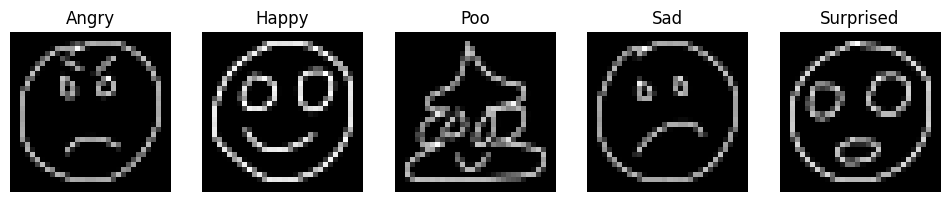

In [9]:
# Muestra una imagen de cada categoría preprocesada
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in preprocessed_emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            break

In [10]:
# Guarda las imágenes preprocesadas con pickle
with open('preprocessed_emojis.pkl', 'wb') as f:
    pickle.dump(preprocessed_emojis, f)